### **INTERPRETABILIDAD DE SCORING CREDITICIO**

#### <strong><font color="green">üéØ Objetivo</font></strong>

Comparar el rendimiento de dos modelos de regresi√≥n log√≠stica: uno con regularizaci√≥n **L1 (Lasso)** y otro con **L2 (Ridge)**, aplicados al dataset de riesgo crediticio. Evaluar m√©tricas de desempe√±o e interpretabilidad con **SHAP.**

Desarrollar un modelo predictivo para el scoring crediticio, evaluando su rendimiento y la capacidad de interpretaci√≥n de sus decisiones. Los estudiantes implementar√°n un modelo de clasificaci√≥n con regularizaci√≥n y emplear√°n t√©cnicas de interpretabilidad como SHAP o LIME para explicar el comportamiento del modelo

#### <strong><font color="green">Entorno de ejecuci√≥n.</font></strong>

Para este proyecto se utilizar√° el entorno de ejecuci√≥n de Jupyter Notebook. La versi√≥n de python es la 3.12.10 con las siguientes librer√≠as:

- numpy==1.26.4
- pandas==2.2.2
- scipy==1.11.4
- matplotlib==3.9.2
- seaborn==0.13.2
- plotly==5.24.1
- scikit-learn==1.7.1
- shap==0.48.0

In [41]:
# Se importan las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import funciones as f
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import shap

import warnings
warnings.filterwarnings('ignore')

#### <strong><font color="green">1. An√°lisis del dataset y comprensi√≥n del problema</font></strong>

In [42]:
# Cargar datos
credit = fetch_openml(name = 'credit', version = 1, as_frame = True)
df = credit.frame.copy()

In [43]:
# Ver dataset
df

RevolvingUtilizationOfUnsecuredLines   age  \
0                                  0.006999  38.0   
1                                  0.704592  63.0   
2                                  0.063113  57.0   
3                                  0.368397  68.0   
4                                  1.000000  34.0   
...                                     ...   ...   
16709                              1.000000  46.0   
16710                              1.135552  41.0   
16711                              0.920107  31.0   
16712                              0.983825  55.0   
16713                              0.224711  55.0   

       NumberOfTime30-59DaysPastDueNotWorse   DebtRatio  MonthlyIncome  \
0                                       0.0    0.302150         5440.0   
1                                       0.0    0.471441         8000.0   
2                                       0.0    0.068586         5000.0   
3                                       0.0    0.296273         6250.0   
4                                       1.0    0.000000         3500.0   
...                                     ...         ...            ...   
16709                                   0.0  170.398010          401.0   
16710                                   2.0    0.845887         7500.0   
16711                                   1.0    0.176732         1125.0   
16712                                   0.0    0.064116         4600.0   
16713                                   0.0    0.057235         8700.0   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                  4.0                      0.0   
1                                  9.0                      0.0   
2                                 17.0                      0.0   
3                                 16.0                      0.0   
4                                  0.0                      0.0   
...                                ...                      ...   
16709                              3.0                      2.0   
16710                             12.0                      0.0   
16711                              4.0                      1.0   
16712                              2.0                      1.0   
16713                              7.0                      0.0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                               1.0                                   0.0   
1                               1.0                                   0.0   
2                               0.0                                   0.0   
3                               2.0                                   0.0   
4                               0.0                                   0.0   
...                             ...                                   ...   
16709                           0.0                                   0.0   
16710                           4.0                                   1.0   
16711                           0.0                                   0.0   
16712                           0.0                                   0.0   
16713                           0.0                                   0.0   

       NumberOfDependents  SeriousDlqin2yrs  
0                     3.0               0.0  
1                     0.0               0.0  
2                     0.0               0.0  
3                     0.0               0.0  
4                     1.0               0.0  
...                   ...               ...  
16709                 2.0               1.0  
16710                 0.0               1.0  
16711                 0.0               1.0  
16712                 6.0               1.0  
16713                 0.0               1.0  

[16714 rows x 11 columns]

In [44]:
# Exploraci√≥n b√°sica del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  16714 non-null  float64
 1   age                                   16714 non-null  float64
 2   NumberOfTime30-59DaysPastDueNotWorse  16714 non-null  float64
 3   DebtRatio                             16714 non-null  float64
 4   MonthlyIncome                         16714 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       16714 non-null  float64
 6   NumberOfTimes90DaysLate               16714 non-null  float64
 7   NumberRealEstateLoansOrLines          16714 non-null  float64
 8   NumberOfTime60-89DaysPastDueNotWorse  16714 non-null  float64
 9   NumberOfDependents                    16714 non-null  float64
 10  SeriousDlqin2yrs                      16714 non-null  float64
dtypes: float64(11)


In [45]:
# Estad√≠sticas descriptivas
print(df.describe(include = "all"))

       RevolvingUtilizationOfUnsecuredLines           age  \
count                          16714.000000  16714.000000   
mean                               4.799862     48.798672   
std                              204.062345     13.906078   
min                                0.000000     21.000000   
25%                                0.082397     38.000000   
50%                                0.443080     48.000000   
75%                                0.926637     58.000000   
max                            22000.000000    101.000000   

       NumberOfTime30-59DaysPastDueNotWorse     DebtRatio  MonthlyIncome  \
count                          16714.000000  16714.000000   16714.000000   
mean                               1.110267     30.980298    6118.120258   
std                                7.172890    719.694859    5931.841779   
min                                0.000000      0.000000       0.000000   
25%                                0.000000      0.155971    3128.5000

In [46]:
# An√°lisis calidad de datos
analysis_result = f.data_quality_analysis(df).set_index('Columna')
print(analysis_result.sort_values('Tipo de dato'))

                                     Tipo de dato  Valores √∫nicos  \
Columna                                                             
RevolvingUtilizationOfUnsecuredLines      float64           13887   
age                                       float64              78   
NumberOfTime30-59DaysPastDueNotWorse      float64              16   
DebtRatio                                 float64           16128   
MonthlyIncome                             float64            5150   
NumberOfOpenCreditLinesAndLoans           float64              48   
NumberOfTimes90DaysLate                   float64              18   
NumberRealEstateLoansOrLines              float64              20   
NumberOfTime60-89DaysPastDueNotWorse      float64              12   
NumberOfDependents                        float64               9   
SeriousDlqin2yrs                          float64               2   

                                      Valores nulos  % nulos  
Columna                               


üìä Distribuci√≥n de variables


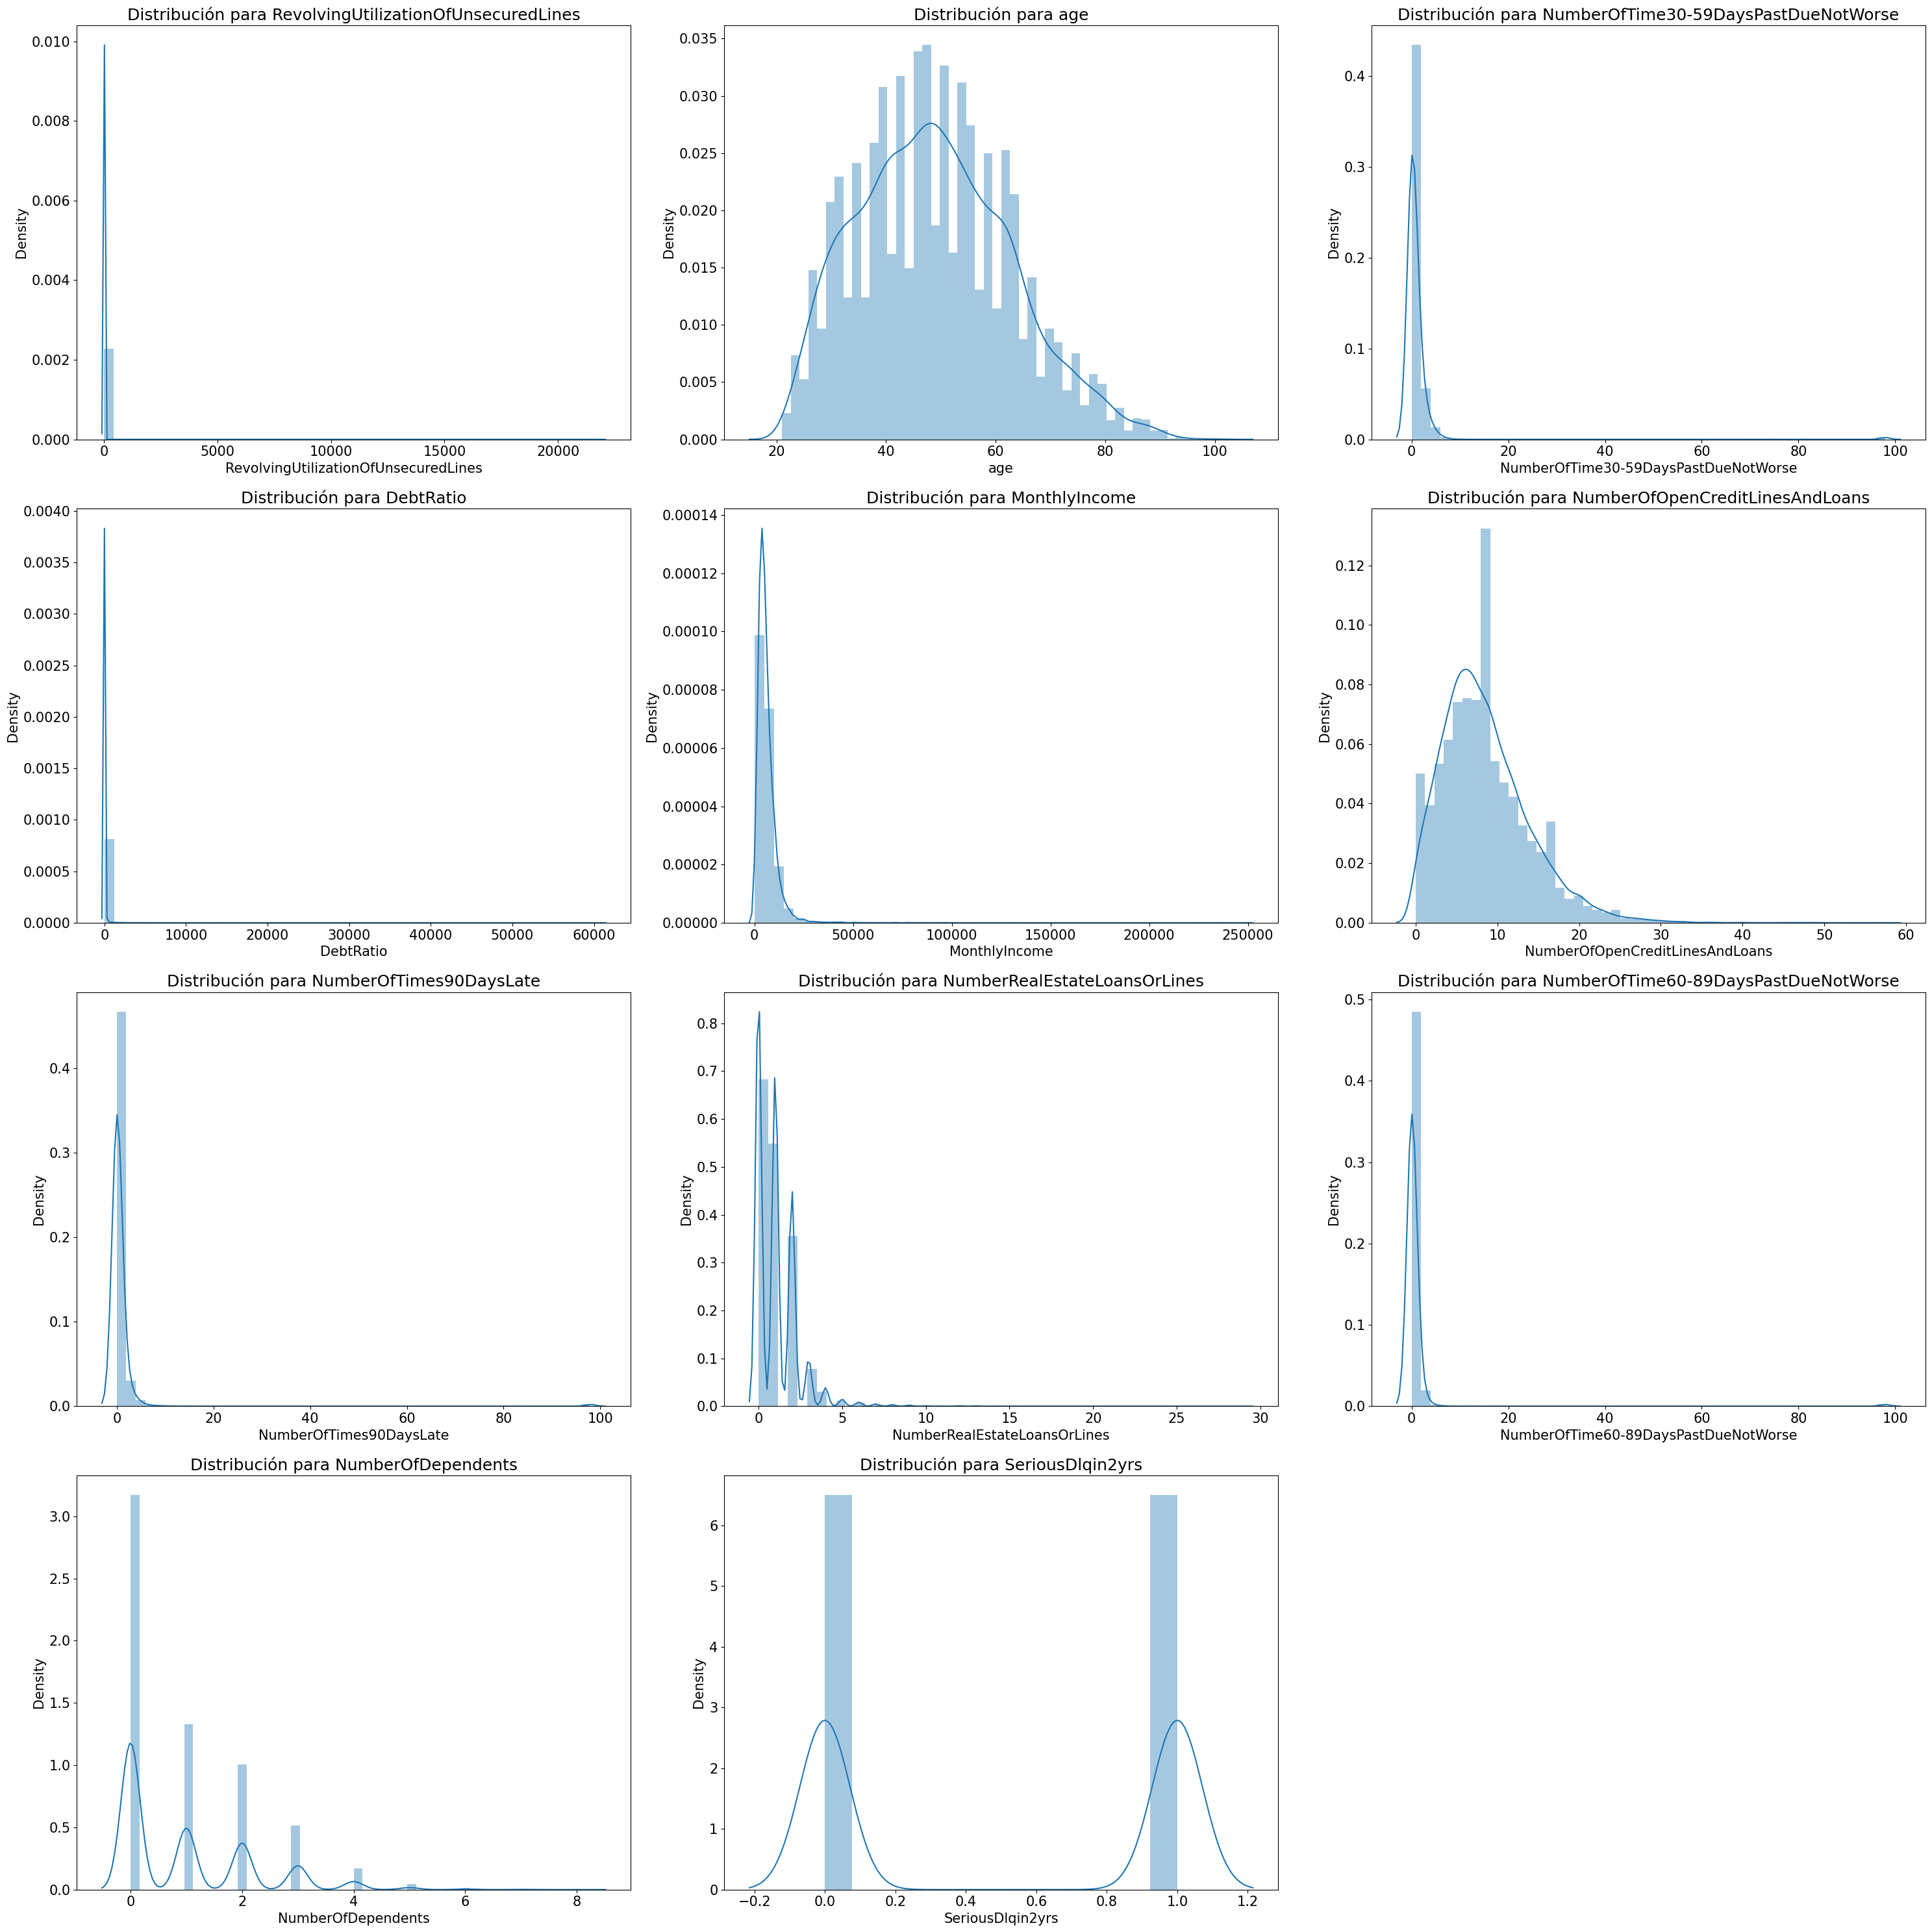

In [47]:
# An√°lisis exploratorio de datos
# Imprime un encabezado para indicar el inicio del an√°lisis de distribuci√≥n de variables
print(f"\nüìä Distribuci√≥n de variables")

# Aumenta el tama√±o de fuente de todos los gr√°ficos para mejorar la visualizaci√≥n
plt.rcParams.update({'font.size': 15})

# Define el tama√±o general de la figura que contendr√° todos los subgr√°ficos
plt.figure(figsize = (30, 30))

# Itera sobre todas las columnas del DataFrame para graficar su distribuci√≥n
for n, i in enumerate(list(df.columns)):
    # Crea un subplot en una grilla de 4 filas x 3 columnas en la posici√≥n correspondiente
    plt.subplot(4, 3, n + 1)

    # Si la columna es categ√≥rica (tipo object), se usa un gr√°fico de barras
    if analysis_result.loc[i, 'Tipo de dato'] == 'object':
        # Cuenta y grafica las frecuencias de las 7 categor√≠as m√°s comunes
        sns.countplot(y=df[i], order=df[i].value_counts().iloc[:7].index)
        plt.title('Frecuencias para {}'.format(i))  # T√≠tulo del gr√°fico

    else:
        # Si la columna es num√©rica, se usa un histograma con curva de densidad
        sns.distplot(df[i])
        plt.title('Distribuci√≥n para {}'.format(i))  # T√≠tulo del gr√°fico

    # Ajusta el layout del gr√°fico para evitar sobreposiciones
    plt.tight_layout()

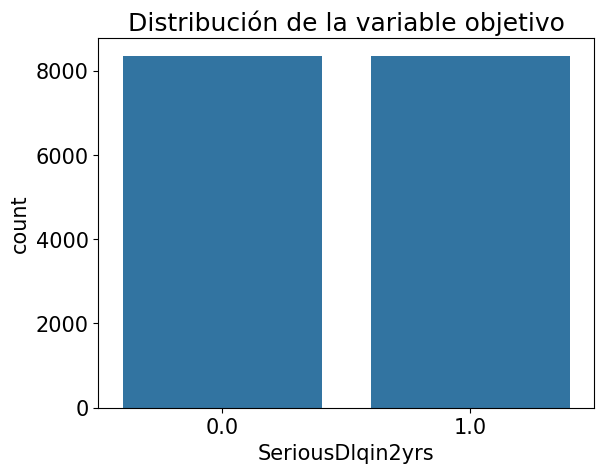

In [48]:
# Ver distribuci√≥n de la variable objetivo
sns.countplot(x = 'SeriousDlqin2yrs', data = df)
plt.title('Distribuci√≥n de la variable objetivo')
plt.show()

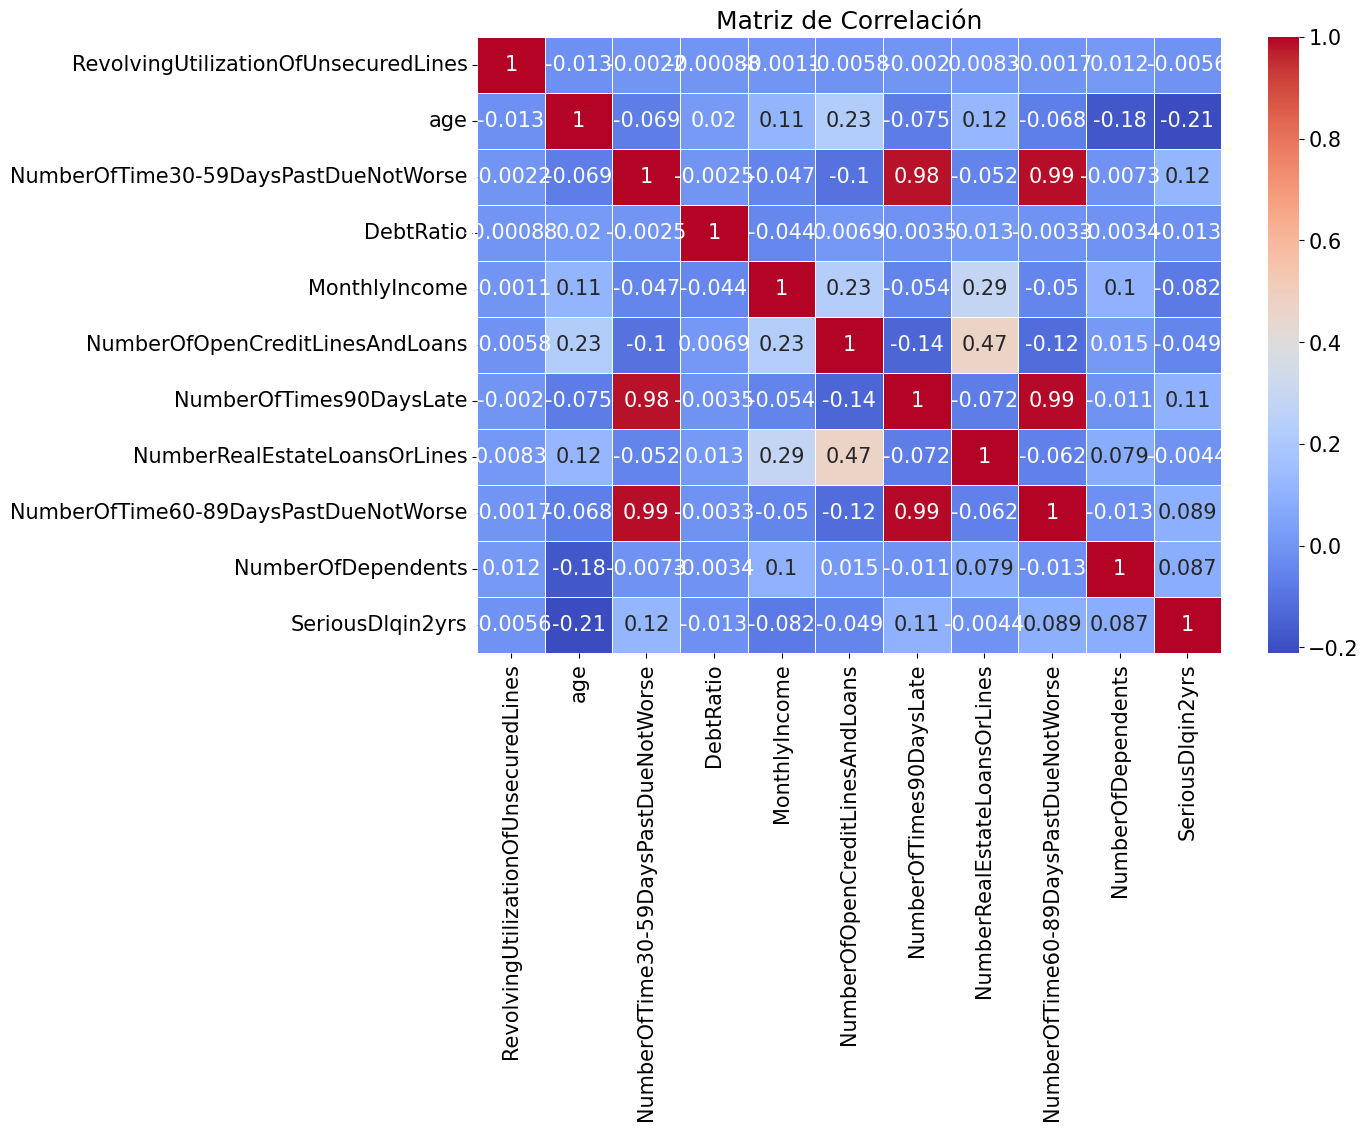

In [49]:
# Crea variable de matriz de correlaci√≥n entre las variables num√©ricas
correlation_matrix = df.select_dtypes(include = ['float64', 'int64']).corr()

# Gr√°fica de correlaci√≥n
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Matriz de Correlaci√≥n')
plt.show()


üìä Correlaci√≥n de variables con objetivo ('SeriousDlqin2yrs')


<Axes: >

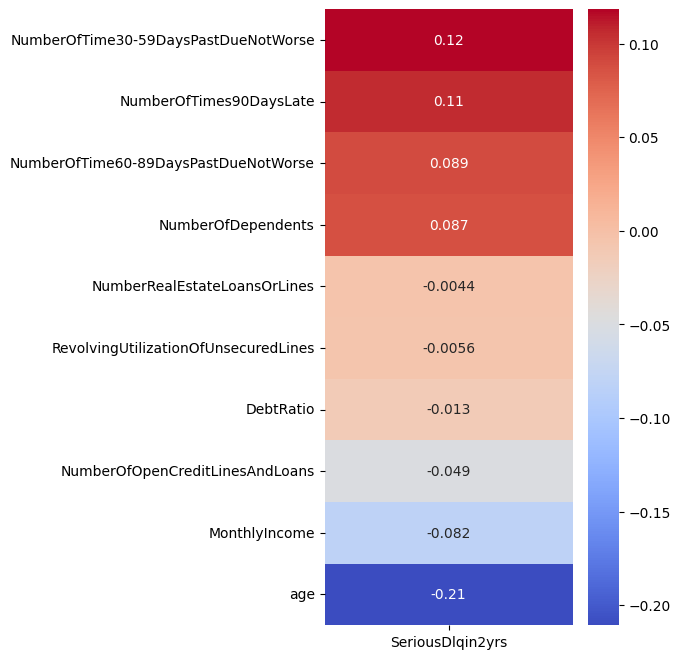

In [50]:
# Gr√°fico de valores de correlaci√≥n respecto a "SeriousDlqin2yrs"
print(f"\nüìä Correlaci√≥n de variables con objetivo ('SeriousDlqin2yrs')")
plt.rcParams.update({'font.size': 10})
plt.figure(figsize = (4, 8))
sns.heatmap(correlation_matrix.loc[:, ['SeriousDlqin2yrs']].sort_values('SeriousDlqin2yrs', ascending = False).iloc[1:], cmap = 'coolwarm', annot = True)

üìä **An√°lisis Exploratorio de Variables y Generaci√≥n de Hip√≥tesis**

üîç **Distribuci√≥n de Variables**

- **Variables sesgadas positivamente (asimetr√≠a a la derecha)**:  
   - `RevolvingUtilizationOfUnsecuredLines`, `DebtRatio`, `MonthlyIncome`, `NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTimes90DaysLate`, `NumberOfTime60-89DaysPastDueNotWorse`.

  Estas variables tienen muchos valores bajos y unos pocos valores extremadamente altos. Indican que:
  - Muchos clientes usan poco sus l√≠neas de cr√©dito.
  - Pocos clientes presentan altos niveles de deuda o morosidad.

- **Variables aproximadamente normales**:  
   - `age` tiene una distribuci√≥n cercana a normal entre los 20 y 80 a√±os.

- **Variable objetivo (`SeriousDlqin2yrs`)**:  
   - Su distribuci√≥n est√° **balanceada**, es decir, hay una proporci√≥n similar de casos con y sin incumplimiento, lo que es ideal para tareas de clasificaci√≥n.

---

üìà **Correlaci√≥n con la Variable Objetivo**

| Variable                                 | Correlaci√≥n con `SeriousDlqin2yrs` |
|------------------------------------------|------------------------------------|
| `NumberOfTime30-59DaysPastDueNotWorse`  | **0.12**                           |
| `NumberOfTimes90DaysLate`               | **0.11**                           |
| `NumberOfTime60-89DaysPastDueNotWorse`  | **0.089**                          |
| `NumberOfDependents`                    | **0.087**                          |
| `age`                                   | **-0.21**                          |
| `MonthlyIncome`                         | -0.082                             |
| `NumberOfOpenCreditLinesAndLoans`       | -0.049                             |

---

üí° **Hip√≥tesis Generadas**

1. **Historial de morosidad aumenta el riesgo crediticio**  
   Las variables relacionadas con pagos atrasados presentan la mayor correlaci√≥n positiva con el riesgo de incumplimiento.  
   **Hip√≥tesis**: A mayor n√∫mero de pagos atrasados, mayor probabilidad de incumplimiento futuro.

2. **La edad tiene relaci√≥n inversa con el riesgo**  
   `age` tiene la correlaci√≥n negativa m√°s alta.  
   **Hip√≥tesis**: Personas mayores tienden a ser m√°s estables financieramente y presentan menor riesgo.

3. **Mayores ingresos podr√≠an reducir el riesgo**  
   Aunque la correlaci√≥n no es fuerte, es negativa.  
   **Hip√≥tesis**: Clientes con mayores ingresos tienen m√°s capacidad de pago.

4. **Mayor n√∫mero de dependientes podr√≠a aumentar el riesgo**  
   **Hip√≥tesis**: Las responsabilidades econ√≥micas adicionales afectan la capacidad de pago del cliente.

5. **Uso extremo de cr√©dito podr√≠a indicar riesgo**  
   A pesar de su baja correlaci√≥n, las variables como `RevolvingUtilizationOfUnsecuredLines` tienen valores extremos que podr√≠an ser importantes en modelos no lineales.  
   **Hip√≥tesis**: Clientes que usan intensamente sus l√≠neas de cr√©dito sin pagarlas representan un mayor riesgo, aunque son menos frecuentes.

---

### üß† Recomendaciones para Modelado

- Priorizar las siguientes variables:  
  `NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTimes90DaysLate`, `NumberOfTime60-89DaysPastDueNotWorse`, `age`, `NumberOfDependents`.

- Aplicar t√©cnicas de regularizaci√≥n o selecci√≥n de caracter√≠sticas para validar emp√≠ricamente estas hip√≥tesis.

- Considerar escalar variables sesgadas y manejar valores extremos con precauci√≥n.

---

#### <strong><font color="green">2. Preprocesamiento de datos</font></strong>

In [51]:
# Separaci√≥n de variables predictoras (X) y objetivo (y)
X = df.drop(columns = 'SeriousDlqin2yrs')      # Variables predictoras
y = df['SeriousDlqin2yrs'].astype(int)         # Variable objetivo

In [52]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [53]:
# Escalar variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)      # Solo ajusta con datos de entrenamiento
X_test_scaled = scaler.transform(X_test)            # Aplica misma transformaci√≥n al conjunto de prueba

In [54]:
# Ver cantidad de datos de entrenamiento y prueba
print("Cantidad de datos:")
print(f"Train: {X_train_scaled.shape}, Test: {X_test_scaled.shape}")

Cantidad de datos:
Train: (13371, 10), Test: (3343, 10)


#### <strong><font color="green">3. Entrenamiento de modelos</font></strong>

##### <strong><font color="DarkSeaGreen">üî∏Regresi√≥n Log√≠stica con Regularizaci√≥n L1 (Lasso)</font></strong>

In [55]:
# Crear el modelo de Regresi√≥n Log√≠stica con regularizaci√≥n L1 (Lasso)
lasso = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 1.0, random_state = 42)

In [56]:
# Entrenar el modelo de Regresi√≥n Log√≠stica con regularizaci√≥n L1 (Lasso)
lasso.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

##### <strong><font color="DarkSeaGreen">üî∏Regresi√≥n Log√≠stica con Regularizaci√≥n L2 (Ridge)</font></strong>

In [57]:
# Crear el modelo de Regresi√≥n Log√≠stica con regularizaci√≥n L2 (Ridge)
ridge = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 1.0, random_state = 42)

In [58]:
# Entrenar el modelo de Regresi√≥n Log√≠stica con regularizaci√≥n L2 (Ridge)
ridge.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42, solver='liblinear')

#### <strong><font color="green">4. Evaluaci√≥n de los modelos</font></strong>

In [59]:
# Crear diccionario de modelos
models = {'Lasso': lasso, 'Ridge': ridge}

In [60]:
# Evaluar los modelos
for name, model in models.items():
    # Imprime el nombre del modelo que se est√° evaluando
    print(f"\nüî∏Reporte del modelo {name}:\n")

    # Genera las predicciones de clase (0 o 1) sobre el conjunto de prueba escalado
    y_pred = model.predict(X_test_scaled)

    # Genera las probabilidades estimadas de la clase positiva (1)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Muestra el reporte de clasificaci√≥n: precisi√≥n, recall, f1-score por clase
    print(classification_report(y_test, y_pred))

    # Calcula e imprime el AUC-ROC, que eval√∫a la capacidad de discriminaci√≥n del modelo
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")


üî∏Reporte del modelo Lasso:

              precision    recall  f1-score   support

           0       0.69      0.83      0.75      1672
           1       0.78      0.62      0.69      1671

    accuracy                           0.72      3343
   macro avg       0.73      0.72      0.72      3343
weighted avg       0.73      0.72      0.72      3343

AUC-ROC: 0.7939

üî∏Reporte del modelo Ridge:

              precision    recall  f1-score   support

           0       0.68      0.82      0.75      1672
           1       0.78      0.62      0.69      1671

    accuracy                           0.72      3343
   macro avg       0.73      0.72      0.72      3343
weighted avg       0.73      0.72      0.72      3343

AUC-ROC: 0.7931



üìä Matriz de Confusi√≥n - Lasso


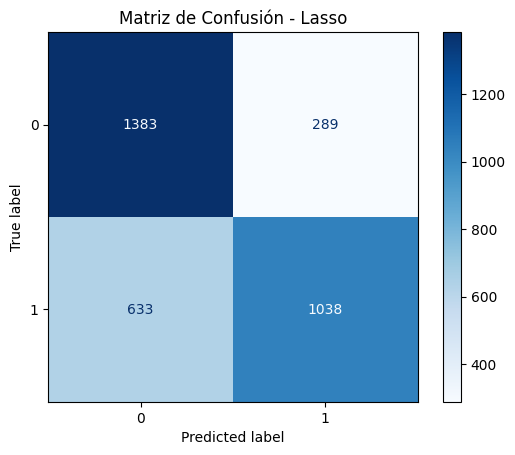


üìä Matriz de Confusi√≥n - Ridge


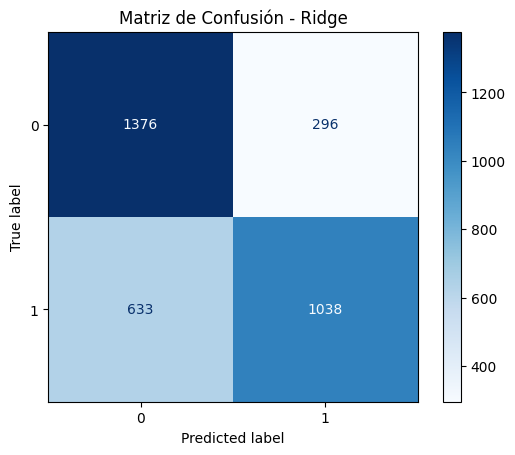

In [61]:
# Matriz de confusi√≥n
for name, model in models.items():
    # Imprime un encabezado indicando a qu√© modelo pertenece la matriz de confusi√≥n
    print(f"\nüìä Matriz de Confusi√≥n - {name}")

    # Genera las predicciones de clase (0 o 1) para el conjunto de prueba escalado
    y_pred = model.predict(X_test_scaled)

    # Calcula la matriz de confusi√≥n comparando las etiquetas verdaderas con las predichas
    cm = confusion_matrix(y_test, y_pred)

    # Crea el objeto para mostrar gr√°ficamente la matriz de confusi√≥n
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)

    # Dibuja la matriz de confusi√≥n con un mapa de color azul
    disp.plot(cmap = 'Blues')

    # Asigna un t√≠tulo al gr√°fico con el nombre del modelo
    plt.title(f'Matriz de Confusi√≥n - {name}')

    # Desactiva la cuadr√≠cula para una visualizaci√≥n m√°s limpia
    plt.grid(False)

    # Muestra el gr√°fico en pantalla
    plt.show()

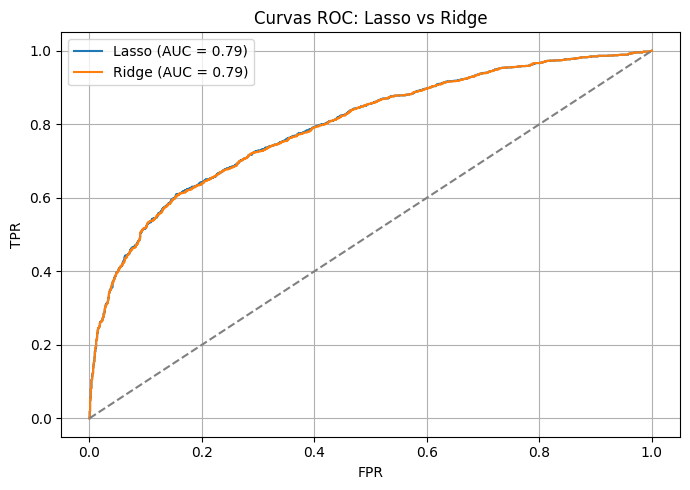

In [62]:
# Curva ROC
plt.figure(figsize = (7, 5))

# Itera sobre cada modelo para calcular y graficar su curva ROC
for name, model in models.items():
    # Obtiene las probabilidades de clase positiva (1) para el conjunto de prueba
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calcula la tasa de falsos positivos (FPR) y verdaderos positivos (TPR)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    # Calcula el AUC (√Årea bajo la curva ROC) como m√©trica de rendimiento
    auc = roc_auc_score(y_test, y_proba)

    # Dibuja la curva ROC del modelo con su nombre y AUC en la leyenda
    plt.plot(fpr, tpr, label = f"{name} (AUC = {auc:.2f})")

# Dibuja la l√≠nea diagonal de referencia (modelo aleatorio)
plt.plot([0, 1], [0, 1], '--', color = 'gray')

# Asigna t√≠tulo y etiquetas a los ejes
plt.title("Curvas ROC: Lasso vs Ridge")
plt.xlabel("FPR")  # Tasa de falsos positivos
plt.ylabel("TPR")  # Tasa de verdaderos positivos

# Muestra la leyenda con los nombres de los modelos y sus AUC
plt.legend()

# Activa la cuadr√≠cula para mejor visualizaci√≥n
plt.grid()

# Ajusta el dise√±o para evitar recortes
plt.tight_layout()

# Muestra el gr√°fico final
plt.show()

#### <strong><font color="green">5. Implementaci√≥n de t√©cnicas de interpretabilidad</font></strong>

##### <strong><font color="DarkSeaGreen">üî∏SHAP para modelo de Regresi√≥n Log√≠stica con Regularizaci√≥n L1 (Lasso)</font></strong>

In [63]:
# Inicializar SHAP Explainer
"""
Crea un objeto explicador SHAP para el modelo Lasso (regresi√≥n log√≠stica con regularizaci√≥n L1).
Usa el m√©todo 'interventional' para calcular el efecto de cada variable bajo una intervenci√≥n hipot√©tica.
"""
explainer_lasso = shap.LinearExplainer(
    lasso,                  # Modelo Lasso entrenado
    X_train_scaled,         # Datos de entrenamiento escalados (usados como background dataset)
    feature_perturbation = 'interventional'  # Tipo de perturbaci√≥n para explicar la contribuci√≥n de las features
)

# Calcular los valores SHAP
"""
Calcula los valores SHAP para cada observaci√≥n en el conjunto de entrenamiento escalado.
Estos valores representan la contribuci√≥n de cada variable en la predicci√≥n del modelo para cada observaci√≥n.
"""
shap_values_lasso = explainer_lasso.shap_values(X_train_scaled)


üìä Resumen de Importancia Global - Lasso


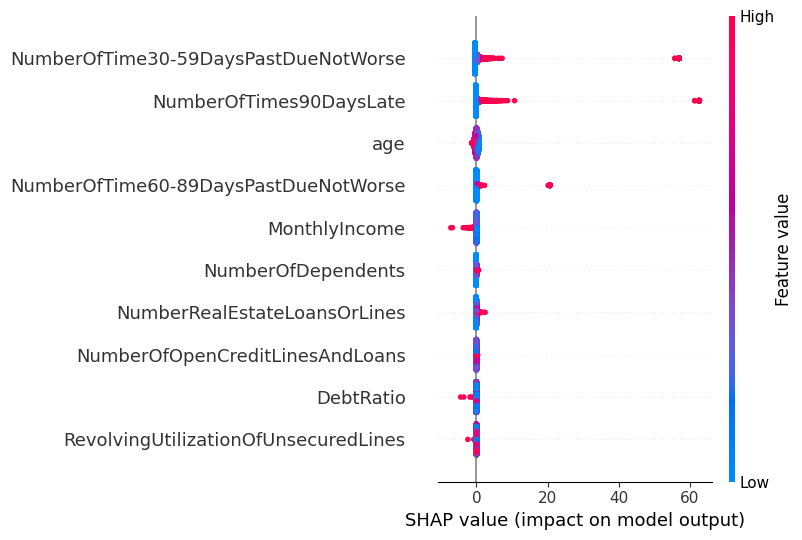

In [64]:
# Mostrar resumen de importancia global
print(f"\nüìä Resumen de Importancia Global - Lasso")

# Genera un gr√°fico resumen de SHAP que muestra la importancia global de cada variable
shap.summary_plot(
    shap_values_lasso,          # Valores SHAP calculados para cada observaci√≥n y variable
    X_train_scaled,             # Conjunto de entrenamiento escalado (datos explicados)
    feature_names = X.columns   # Nombres originales de las variables para el eje y
)


üìä Resumen de Importancia Global - Lasso (Gr√°fico de barras)


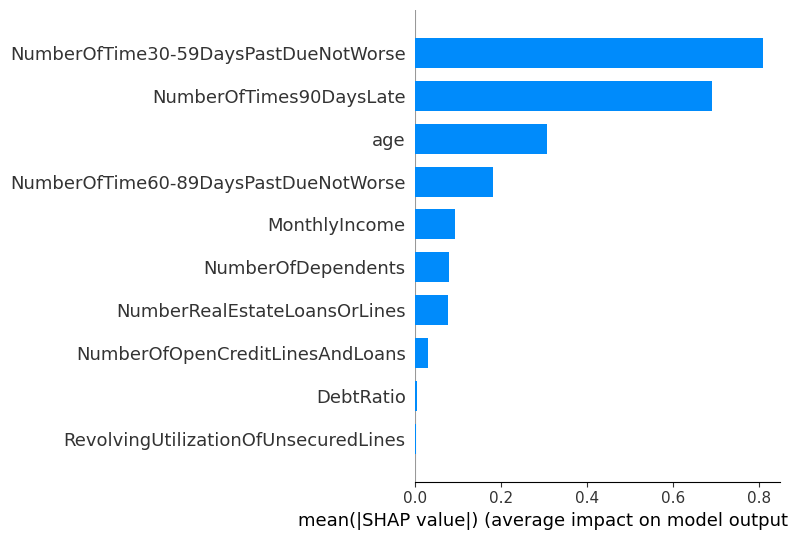

In [65]:
# Visualizar importancia global
print(f"\nüìä Resumen de Importancia Global - Lasso (Gr√°fico de barras)")

# Genera un gr√°fico resumen tipo barra que muestra la importancia global de cada variable
shap.summary_plot(
    shap_values_lasso,             # Valores SHAP del modelo Lasso
    X_train_scaled,                # Datos de entrenamiento escalados
    feature_names = X.columns,     # Nombres originales de las variables
    plot_type = "bar"              # Tipo de gr√°fico: barras ordenadas por importancia media
)

In [66]:
# Mostrar explicaciones locales para una observaci√≥n espec√≠fica
print(f"\nüìä Explicaciones locales - Lasso")

# Inicializa el entorno JS de SHAP para habilitar gr√°ficos interactivos (como force_plot en Jupyter)
shap.initjs()

# Genera un gr√°fico interactivo de tipo force plot para una observaci√≥n espec√≠fica (la primera)
shap.force_plot(
    explainer_lasso.expected_value,     # Valor esperado (promedio base del modelo)
    shap_values_lasso[0],               # Valores SHAP de la primera observaci√≥n
    feature_names = X.columns           # Nombres de las variables explicativas
)


üìä Explicaciones locales - Lasso


##### <strong><font color="DarkSeaGreen">üî∏SHAP para modelo de Regresi√≥n Log√≠stica con Regularizaci√≥n L2 (Ridge)</font></strong>

In [67]:
# Inicializar SHAP Explainer
"""
Crea un objeto explicador SHAP para el modelo Ridge (regresi√≥n log√≠stica con regularizaci√≥n L2).
Usa el m√©todo 'interventional' para calcular el efecto de cada variable bajo una intervenci√≥n hipot√©tica.
"""
explainer_ridge = shap.LinearExplainer(
    ridge,                  # Modelo Ridge entrenado
    X_train_scaled,         # Datos de entrenamiento escalados (usados como background dataset)
    feature_perturbation = 'interventional'  # Tipo de perturbaci√≥n para explicar la contribuci√≥n de las features
)

# Calcular los valores SHAP
"""
Calcula los valores SHAP para cada observaci√≥n en el conjunto de entrenamiento escalado.
Estos valores representan la contribuci√≥n de cada variable en la predicci√≥n del modelo para cada observaci√≥n.
"""
shap_values_ridge = explainer_ridge.shap_values(X_train_scaled)


üìä Resumen de Importancia Global - Ridge


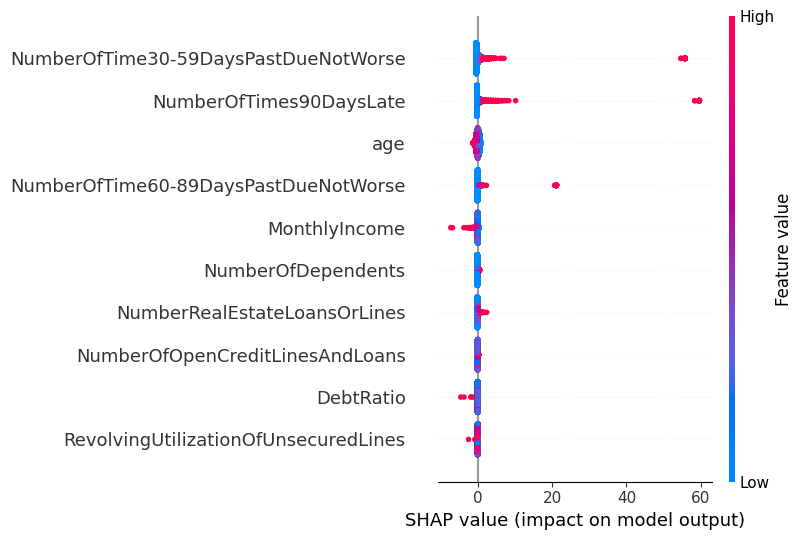

In [68]:
# Mostrar resumen de importancia global
print(f"\nüìä Resumen de Importancia Global - Ridge")

# Genera un gr√°fico resumen de SHAP que muestra la importancia global de cada variable
shap.summary_plot(
    shap_values_ridge,          # Valores SHAP calculados para cada observaci√≥n y variable
    X_train_scaled,             # Conjunto de entrenamiento escalado (datos explicados)
    feature_names = X.columns   # Nombres originales de las variables para el eje y
)


üìä Resumen de Importancia Global - Ridge (Gr√°fico de barras)


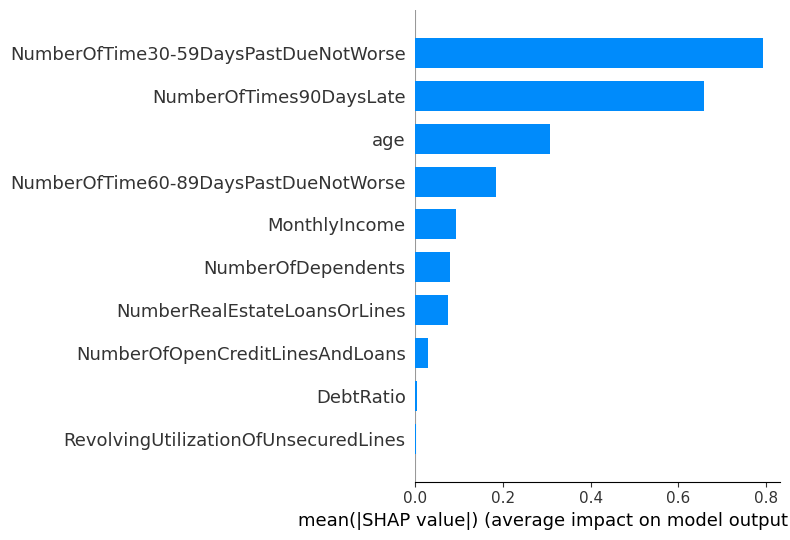

In [69]:
# Visualizar importancia global
print(f"\nüìä Resumen de Importancia Global - Ridge (Gr√°fico de barras)")

# Genera un gr√°fico resumen tipo barra que muestra la importancia global de cada variable
shap.summary_plot(
    shap_values_ridge,             # Valores SHAP del modelo Ridge
    X_train_scaled,                # Datos de entrenamiento escalados
    feature_names = X.columns,     # Nombres originales de las variables
    plot_type = "bar"              # Tipo de gr√°fico: barras ordenadas por importancia media
)

In [70]:
# Mostrar explicaciones locales para una observaci√≥n espec√≠fica
print(f"\nüìä Explicaciones locales - Ridge")

# Inicializa el entorno JS de SHAP para habilitar gr√°ficos interactivos (como force_plot en Jupyter)
shap.initjs()

# Genera un gr√°fico interactivo de tipo force plot para una observaci√≥n espec√≠fica (la primera)
shap.force_plot(
    explainer_ridge.expected_value,     # Valor esperado (promedio base del modelo)
    shap_values_ridge[0],               # Valores SHAP de la primera observaci√≥n
    feature_names = X.columns           # Nombres de las variables explicativas
)


üìä Explicaciones locales - Ridge


#### <strong><font color="green">6. An√°lisis de los resultados</font></strong>

üîé **Evaluaci√≥n y Comparaci√≥n de Modelos con Regularizaci√≥n (Lasso vs Ridge)**

üìä **1. M√©tricas de Desempe√±o**

| M√©trica       | Lasso | Ridge |
|---------------|-------|-------|
| Accuracy      | 0.72  | 0.72  |
| Precision (0) | 0.69  | 0.68  |
| Recall (0)    | 0.83  | 0.82  |
| Precision (1) | 0.78  | 0.78  |
| Recall (1)    | 0.62  | 0.62  |
| F1-score avg  | 0.72  | 0.72  |
| AUC-ROC       | 0.7939| 0.7931|



> üí° Ambos modelos ofrecen resultados pr√°cticamente equivalentes en clasificaci√≥n y AUC, aunque Lasso muestra una ligera ventaja en clasificaci√≥n negativa.

---

üìå **2. Matrices de Confusi√≥n**

- **Lasso**
  - Verdaderos positivos: 1038
  - Falsos negativos: 633
  - Verdaderos negativos: 1383
  - Falsos positivos: 289

- **Ridge**
  - Verdaderos positivos: 1038
  - Falsos negativos: 633
  - Verdaderos negativos: 1376
  - Falsos positivos: 296

> ‚úÖ Lasso clasifica mejor los casos negativos (clientes "buenos") con menos falsos positivos.

---

üß† **3. Interpretabilidad con SHAP**

- **Variables m√°s influyentes (en ambos modelos):**
1. `NumberOfTime30-59DaysPastDueNotWorse`
2. `NumberOfTimes90DaysLate`
3. `age`
4. `NumberOfTime60-89DaysPastDueNotWorse`

- **Observaciones:**
- Atrasos en pagos est√°n altamente correlacionados con un mayor riesgo de incumplimiento.
- Edad m√°s baja tiende a aumentar el riesgo.
- Ingresos mensuales m√°s altos y m√°s l√≠neas de cr√©dito inmobiliario tienden a reducir el riesgo.

> üìà SHAP permite observar tanto la **importancia global** de las variables como su **impacto individual** en cada predicci√≥n.

---

üí¨ **4. Reflexi√≥n sobre Interpretabilidad**

La interpretabilidad es cr√≠tica en contextos de **scoring crediticio** por varias razones:

üîç **Transparencia y confianza:**
- Los modelos deben ser comprensibles para auditores, analistas y usuarios finales.

‚öñÔ∏è **Toma de decisiones √©ticas:**
- Permite detectar sesgos, evitar discriminaci√≥n y tomar decisiones m√°s justas.

üìú **Cumplimiento normativo:**
- Legislaciones como **GDPR** exigen justificar las decisiones automatizadas.

> üß© SHAP aporta una explicaci√≥n detallada de cada decisi√≥n del modelo, ayudando a identificar qu√© factores fueron decisivos.

---

‚úÖ **Conclusi√≥n**

Tanto **Lasso** como **Ridge** ofrecen un rendimiento similar, pero:

- **Lasso** es preferible por su capacidad de selecci√≥n de variables (algunos coeficientes se anulan).
- La **ligera mejora en precisi√≥n y AUC-ROC** de Lasso lo hace m√°s efectivo.
- La interpretabilidad con **SHAP** resulta esencial para implementar modelos de scoring responsables y confiables.

> üéØ Para una soluci√≥n robusta en scoring crediticio, se recomienda usar:
> - Modelos penalizados (Lasso o Ridge)
> - Evaluaci√≥n con m√©tricas variadas
> - Explicabilidad mediante SHAP

---
